In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  #for the statistical tests
from scipy import stats as stats
from sklearn.preprocessing import LabelEncoder

import ydata_profiling as pdl

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

sns.set_context('talk')


# for better visualization
plt.style.use('ggplot')


#Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Background:
The Lending Club is a peer-to-peer lending site where members make loans to
each other. The site makes anonymized data on loans and borrowers publicly available.

### BUSINESS PROBLEM 1:
Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
amounts)

b. Loan length is directly effecting intrest rate.

c. Inrest rate varies for different purpose of loans.

d. There is relationship between FICO scores and Home Ownership. It means that, People
with owning home will have high FICO scores.

#### Dataset

In [438]:
input_file_path = "C:\\Projects\\EDA\\data\\input_files//"
input_file_name = "LoansData.csv"  
input_file_path + input_file_name 
Loans_data = pd.read_csv(input_file_path + input_file_name )

In [439]:
Loans_data.shape

(2500, 14)

In [441]:
Loans_data.head(15)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
5,6000.0,6000.0,15.31%,36 months,other,20.05%,CT,OWN,4891.67,670-674,17.0,10391.0,2.0,3 years
6,10000.0,10000.0,7.90%,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,720-724,10.0,15957.0,0.0,10+ years
7,33500.0,33450.0,17.14%,60 months,credit_card,14.70%,LA,MORTGAGE,13863.42,705-709,12.0,27874.0,0.0,10+ years
8,14675.0,14675.0,14.33%,36 months,credit_card,26.92%,CA,RENT,3150.00,685-689,9.0,7246.0,1.0,8 years
9,7000.0,7000.0,6.91%,36 months,credit_card,7.10%,CA,RENT,5000.00,715-719,8.0,7612.0,0.0,3 years


#### Checking Datatypes 

In [442]:
Loans_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [443]:
Loans_data['Interest.Rate'] = Loans_data['Interest.Rate'].str.replace('%', '').astype('float64')

In [444]:
Loans_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

#### Handling Null Values

In [445]:
Loans_data.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [446]:
#checking for None as missing vaues 
check_none = lambda col: 'NONE' in col.unique()
none_cols = Loans_data.apply(check_none)
print("The following columns contain 'NONE' values:")
print(none_cols[none_cols].index)

The following columns contain 'NONE' values:
Index(['Home.Ownership'], dtype='object')


C:\Users\dell\AppData\Local\Temp\ipykernel_14704\678930485.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  check_none = lambda col: 'NONE' in col.unique()


In [447]:
# replace "NONE" with NaN
Loans_data['Home.Ownership'] = Loans_data['Home.Ownership'].replace('NONE', np.nan)

In [448]:
Loans_data.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     2
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [449]:
for col in Loans_data.columns:
    if Loans_data[col].dtype == "float64":
        Loans_data[col].fillna(Loans_data[col].mean(), inplace = True)
    elif Loans_data[col].dtype == "object":
        Loans_data[col].fillna(Loans_data[col].mode()[0], inplace = True)

In [450]:
Loans_data.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

#### Encoding the data

In [451]:
label_encode = LabelEncoder()

In [452]:
Loans_data['State'] = label_encode.fit_transform(Loans_data['State'])

In [453]:
Loans_data['Home.Ownership'] = label_encode.fit_transform(Loans_data['Home.Ownership'])

In [454]:
Loans_data['Loan.Length'] = label_encode.fit_transform(Loans_data['Loan.Length'])

In [455]:
Loans_data['Loan.Purpose'] = label_encode.fit_transform(Loans_data['Loan.Purpose'])

In [456]:
Loans_data['Employment.Length'] = label_encode.fit_transform(Loans_data['Employment.Length'])

In [457]:
Loans_data['FICO.Range'] = label_encode.fit_transform(Loans_data['FICO.Range'])

In [458]:
Loans_data.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,0,2,14.90%,36,0,6541.67,19,14.0,14272.0,2.0,10
1,19200.0,19200.0,12.12,0,2,28.36%,38,0,4583.33,15,12.0,11140.0,1.0,2
2,35000.0,35000.0,21.98,1,2,23.81%,4,0,11500.00,10,14.0,21977.0,1.0,2
3,10000.0,9975.0,9.99,0,2,14.30%,15,0,3833.33,11,10.0,9346.0,0.0,5
4,12000.0,12000.0,11.71,0,1,18.78%,27,3,3195.00,11,11.0,14469.0,0.0,9


##### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

#### Correlations

In [459]:
#Filtering the data required for this analysis
Interestrate_loanamount= Loans_data[["Amount.Funded.By.Investors","Interest.Rate"]]

In [460]:
#Defining the hypothesis statements 
# H0 : There is no relationship between interest rate and loan amounts
# Ha : There is relationship between interest and loan amounts 
# CI = 99%, P_value = 0.01

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


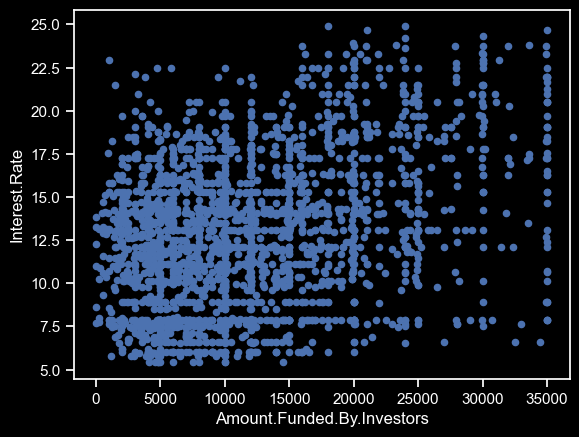

In [461]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color': 'white'})
Interestrate_loanamount.plot( kind = 'scatter', x = "Amount.Funded.By.Investors", y = "Interest.Rate" )
plt.show()

In [462]:
# perform the test 
stats.pearsonr( Interestrate_loanamount["Amount.Funded.By.Investors"],Interestrate_loanamount["Interest.Rate"])

PearsonRResult(statistic=0.33742660344157105, pvalue=1.2764840056932822e-67)

CONCLUSION:
Since the calculate p value is lesser than the defined p value, we fail to reject the alternative hypothesis. We can claim there is a relationship between interest rate and loan amount.Because the correlation value is positive, we can say its directly proportional i...e if the loan amount is increased, the interest rate also increased and vice versa.

##### b. Loan length is directly effecting intrest rate.

#### Independent  sample ttest

In [463]:
#Defining the hypothesis statements 
#H0 : There is no relationship between Loan length and interest rate 
#Ha: There is relationship between loan length and interest rate 
# CI: 95 , P_value = 0.05% 

In [464]:
Loans_data['Loan.Length'].value_counts()

0    1952
1     548
Name: Loan.Length, dtype: int64

In [465]:
#declare the variable which we want to do the analysis 
var_name = 'Interest.Rate'

In [466]:
#filter the data based on loan length
months_36 =Loans_data.loc[Loans_data['Loan.Length'] == 0, var_name]
months_60 =Loans_data.loc[Loans_data['Loan.Length'] == 1, var_name]

In [467]:
#mean for different loan length
print("Mean for 36 months loan length", months_36.mean())
print("Mean for 60 months loan length", months_60.mean())

Mean for 36 months loan length 12.127141791302005
Mean for 60 months loan length 16.40746350364961


In [468]:
#perform the test
stats.ttest_ind(months_36, months_60)

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110)

CONCLUSION:
Since the calculated p value is lesser then the defined p value, we fail to reject the alternative hypothesis. And so can claim there is of Loan length on the rate of interest.

#### c. Inrest rate varies for different purpose of loans.

In [469]:
#Defining the hypothesis statements 
#H0 : There is no variation in the interest rate and the purpose of the loan
#Ha: There is variation in the interest rate and the purpose of the loan
# CI: 95 , P_value = 0.05% 

In [470]:
Loans_data['Loan.Purpose'].value_counts()

2     1307
1      444
9      201
4      152
6      101
11      87
0       50
13      39
7       30
8       29
12      21
5       20
3       15
10       4
Name: Loan.Purpose, dtype: int64

In [471]:
# declare the variable for which we want to do the analysis
var_name = 'Interest.Rate'

In [472]:
#filter the data based on loan purpose
Zero =Loans_data.loc[Loans_data['Loan.Purpose'] == 0, var_name]
One =Loans_data.loc[Loans_data['Loan.Purpose'] == 1, var_name]
Two =Loans_data.loc[Loans_data['Loan.Purpose'] == 2, var_name]
Three =Loans_data.loc[Loans_data['Loan.Purpose'] == 3, var_name]
Four=Loans_data.loc[Loans_data['Loan.Purpose'] == 4, var_name]
Five =Loans_data.loc[Loans_data['Loan.Purpose'] == 5, var_name]
Six =Loans_data.loc[Loans_data['Loan.Purpose'] == 6, var_name]
Seven =Loans_data.loc[Loans_data['Loan.Purpose'] == 7, var_name]
Eight=Loans_data.loc[Loans_data['Loan.Purpose'] == 8, var_name]
Nine =Loans_data.loc[Loans_data['Loan.Purpose'] == 9, var_name]
Ten=Loans_data.loc[Loans_data['Loan.Purpose'] == 10, var_name]
Eleven=Loans_data.loc[Loans_data['Loan.Purpose'] == 11, var_name]
Twelve=Loans_data.loc[Loans_data['Loan.Purpose'] == 12, var_name]
Thirteen =Loans_data.loc[Loans_data['Loan.Purpose'] == 13, var_name]


In [473]:
#mean for different loan purpose 
print("Mean for loan purpose Zero", Zero.mean())
print("Mean for loan purpose One", One.mean())
print("Mean for loan purpose Two", Two.mean())
print("Mean for loan purpose Three", Three.mean())
print("Mean for loan purpose Four", Four.mean())
print("Mean for loan purpose Five", Five.mean())
print("Mean for loan purpose Six", Six.mean())
print("Mean for loan purpose Seven", Seven.mean())
print("Mean for loan purpose Eight", Eight.mean())
print("Mean for loan purpose Nine", Nine.mean())
print("Mean for loan purpose Ten", Ten.mean())
print("Mean for loan purpose Eleven", Eleven.mean())
print("Mean for loan purpose Twelve", Twelve.mean())
print("Mean for loan purpose Thirteen", Thirteen.mean())

Mean for loan purpose Zero 11.113000000000001
Mean for loan purpose One 13.050687811510445
Mean for loan purpose Two 13.586916602907444
Mean for loan purpose Three 11.007333333333332
Mean for loan purpose Four 11.594276315789479
Mean for loan purpose Five 13.448000000000002
Mean for loan purpose Six 10.797821782178215
Mean for loan purpose Seven 11.649666666666668
Mean for loan purpose Eight 13.621034482758622
Mean for loan purpose Nine 13.159552238805967
Mean for loan purpose Ten 9.8775
Mean for loan purpose Eleven 12.839195402298845
Mean for loan purpose Twelve 11.966190476190476
Mean for loan purpose Thirteen 12.073215084888428


In [474]:
#perform the test 
stats.f_oneway(One, Two, Three, Four, Five, Six, Seven, Eight, Nine, Ten, Eleven, Twelve, Thirteen)

F_onewayResult(statistic=7.133918096349252, pvalue=6.176941224109585e-13)

CONCLUSION:
Since the calculate p value is lesser than the defined p value, we fail to reject the null hypothesis and also we can claim there is a variation in the purpose of the loan and the interest rate.

#### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [477]:
#sample size - 12

In [478]:
Loans_data.head(1)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.9,0,2,14.90%,36,0,6541.67,19,14.0,14272.0,2.0,10


In [479]:
Loans_data['FICO.Range'] = label_encode.inverse_transform(Loans_data['FICO.Range'])

In [480]:
Score= Loans_data['FICO.Range'].str.split('-', expand = True)

In [481]:
Score = Score.rename (columns = {0: 'Lower_bound', 1: 'Upper_bound'})

In [482]:
Score.dtypes

Lower_bound    object
Upper_bound    object
dtype: object

In [483]:
Score['Lower_bound'] = Score['Lower_bound'].astype("float64")
Score['Upper_bound'] = Score['Upper_bound'].astype("float64")

In [484]:
Score['FICO_Score'] = ( Score['Lower_bound'] +  Score['Upper_bound'] ) / 2

In [485]:
Score.head(2)

,Lower_bound,Upper_bound,FICO_Score
0,735.0,739.0,737.0
1,715.0,719.0,717.0


In [486]:
Loans_data1 = pd.concat([Loans_data, Score], axis = 1)

In [490]:
Loans_data1.head(15)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Lower_bound,Upper_bound,FICO_Score
0,20000.0,20000.0,8.90,0,2,14.90%,36,0,6541.67,735-739,14.0,14272.0,2.0,10,735.0,739.0,737.0
1,19200.0,19200.0,12.12,0,2,28.36%,38,0,4583.33,715-719,12.0,11140.0,1.0,2,715.0,719.0,717.0
2,35000.0,35000.0,21.98,1,2,23.81%,4,0,11500.00,690-694,14.0,21977.0,1.0,2,690.0,694.0,692.0
3,10000.0,9975.0,9.99,0,2,14.30%,15,0,3833.33,695-699,10.0,9346.0,0.0,5,695.0,699.0,697.0
4,12000.0,12000.0,11.71,0,1,18.78%,27,3,3195.00,695-699,11.0,14469.0,0.0,9,695.0,699.0,697.0
5,6000.0,6000.0,15.31,0,9,20.05%,6,2,4891.67,670-674,17.0,10391.0,2.0,3,670.0,674.0,672.0
6,10000.0,10000.0,7.90,0,2,26.09%,18,3,2916.67,720-724,10.0,15957.0,0.0,1,720.0,724.0,722.0
7,33500.0,33450.0,17.14,1,1,14.70%,17,0,13863.42,705-709,12.0,27874.0,0.0,1,705.0,709.0,707.0
8,14675.0,14675.0,14.33,0,1,26.92%,4,3,3150.00,685-689,9.0,7246.0,1.0,8,685.0,689.0,687.0
9,7000.0,7000.0,6.91,0,1,7.10%,4,3,5000.00,715-719,8.0,7612.0,0.0,3,715.0,719.0,717.0


In [488]:
Loans_data1.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
Lower_bound                       0
Upper_bound                       0
FICO_Score                        0
dtype: int64

In [489]:
Loans_data1['Home.Ownership'].value_counts()

0    1149
3    1146
2     200
1       5
Name: Home.Ownership, dtype: int64

#### F-test

In [491]:
#declaring the variable
vars_name = 'FICO_Score'

In [492]:
#filtering the data 
Own = Loans_data1.loc[Loans_data1['Home.Ownership'] == 2, vars_name ]
Rent =Loans_data1.loc[Loans_data1['Home.Ownership'] == 3,vars_name ]
Mortgage = Loans_data1.loc[Loans_data1['Home.Ownership'] == 0,vars_name ]
Others = Loans_data1.loc[Loans_data1['Home.Ownership'] == 1 ,vars_name ]

In [493]:
#calculating the mean 
print("Average of the people who have own home", Own.mean())
print("Average of the people who have Rental home", Rent.mean())
print("Average of the people who lives in Mortgage", Mortgage.mean())
print("Average of the people who belong to other category", Others.mean())

Average of the people who have own home 708.55
Average of the people who have Rental home 702.0305410122164
Average of the people who lives in Mortgage 713.7362924281985
Average of the people who belong to other category 674.0


In [ ]:
#Defining hypothesis testing 
#H0: There is no relationship between home ownerdhip and the FICO score of the people
#Ha: There is relationship between home ownerdhip and the FICO score of the people
# CI =95%, p_value = 0.05%

In [494]:
stats.f_oneway(Own, Rent, Mortgage, Others)

F_onewayResult(statistic=23.542913921632028, pvalue=5.042749015931857e-15)

CONCLUSION:
Since the calculated p value is less than the defined p_value, we fail to reject the alternative hypothesis. And also we can claim that people with different home ownership have different FICO Score.

# Background
When an order is placed by a customer of a small manufacturing company, a
price quote must be developed for that order. Because each order is unique, quotes must be
established on an order-by-order basis by a pricing expert. The price quote process is laborintensive,
as prices depend on many factors such as the part number, customer, geographic
location, market, and order volume. The sales department manager is concerned that the pricing
process is too complex, and that there might be too much variability in the quoted prices. An
improvement team is tasked with studying and improving the pricing process.
After interviewing experts to develop a better understanding of the current process, the team
designed a study to determine if there is variability between pricing experts. That is, do different
pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and
Barry, were asked to independently provide prices for twelve randomly selected orders. Each
expert provided one price for each of the twelve orders.


### BUSINESS PROBLEM 2:
We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

#### Dataset

In [194]:
input_file_path = "C:\\Projects\\EDA\\data\\input_files//"
input_file_name = "Price_Quotes.csv"  
input_file_path + input_file_name 
Price_Quotes= pd.read_csv(input_file_path + input_file_name )

In [195]:
Price_Quotes.shape

(12, 3)

In [196]:
Price_Quotes.head(15)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


##### Checking data types

In [197]:
Price_Quotes.dtypes

Order_Number    int64
Barry_Price     int64
Mary_Price      int64
dtype: object

In [211]:
Price_Quotes.columns

Index(['Order_Number', 'Barry_Price', 'Mary_Price'], dtype='object')

#### Independent sample ttest

In [ ]:
# Defining the hypothesis testing 
# H0: There is no difference in the average price quotes by Mary and Barry
# Ha: There is difference in the average price quotes by Mary and Barry
#ci: 80% , p_value = 0.20%

In [212]:
#mean for the different quoted price
print("Barry's average quoted price", Price_Quotes['Barry_Price'].mean())
print("Mary's average quoted price", Price_Quotes['Mary_Price'].mean())

Barry's average quoted price 124.33333333333333
Mary's average quoted price 114.75


In [215]:
stats.ttest_ind(Price_Quotes['Barry_Price'],Price_Quotes['Mary_Price'] )

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

CONCLUSION:
Since the calculated p_value is lesser than the defined p_value, we fail to reject the null hypothesis. And we can claim there is difference in the price quoted by Mary and Barry.

## Background
The New Life Residential Treatment Facility is a NGO that treats teenagers who
have shown signs of mental illness. It provides housing and supervision of teenagers who are
making the transition from psychiatric hospitals back into the community. Because many of
the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff
turnover (attrition) is high.

A reengineering program was instituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the
following changes were made:
 Employee shifts were shortened from 10 hours to 8 hours each day.

 Employees were motivated to become more involved in patient treatments. This
included encouraging staff to run various therapeutic treatment sessions and allowing
staff to have more say in program changes.

 The activities budget was increased.

 A facility-wide performance evaluation system was put into place that rewarded staff
participation and innovation.

 Management and staff instituted a program designed to raise expectations about
appropriate behavior from the kids. This included strict compliance with reporting of
behavioral violations, insistence on participation in therapeutic sessions, and a
lowered tolerance for even moderate behavioral infractions.

To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
post-reengineering periods was compiled. The information contains two measures of
behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the
premises without permission), destroys property (e.g., punching a hole in a wall or throwing
furniture through windows), is caught in possession of street drugs, or engages in assault
against other residents or staff members. A teenager is temporarily removed from the facility
when s/he is sent to jail or back to a psychiatric hospital

### BUSINESS PROBLEM 3:
Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

#### Dataset

In [217]:
input_file_path = "C:\\Projects\\EDA\\data\\input_files//"
input_file_name = "Treatment_Facility.csv"  
input_file_path + input_file_name 
Treatment_Facility= pd.read_csv(input_file_path + input_file_name )

In [218]:
Treatment_Facility.shape

(20, 5)

In [219]:
Treatment_Facility.head(3)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [222]:
Treatment_Facility = Treatment_Facility.rename(columns ={'VAR4': 'TRFF', 'VAR5': 'CI'})

In [223]:
Treatment_Facility.head(9)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908


#### Checking dtypes

In [220]:
Treatment_Facility.dtypes

Month                  int64
Reengineer            object
Employee_Turnover    float64
VAR4                 float64
VAR5                 float64
dtype: object

#### Handling null values 

In [224]:
Treatment_Facility.isnull().sum()

Month                0
Reengineer           0
Employee_Turnover    0
TRFF                 0
CI                   0
dtype: int64

#### Independent sample ttest

In [ ]:
#Defining the hypothesis statements 
#H0:There is no change in the critical incidence rate because of the re engineering efforts
#Ha:There is change in the critical incidence rate because of the re engineering efforts
#CI =95% , p_value = 0.15%

In [225]:
#Filtering the data 
variable_name = 'CI'
Prior = Treatment_Facility.loc[Treatment_Facility['Reengineer'] == 'Prior', variable_name ]
Post = Treatment_Facility.loc[Treatment_Facility['Reengineer'] == 'Post', variable_name ]

In [227]:
#Calculating the mean
print("Average of the prior critical incidence rate", Prior.mean())
print("Average of the post critical incidence rate", Post.mean())

Average of the prior critical incidence rate 53.887906321846145
Average of the post critical incidence rate 23.34971927988571


In [228]:
#performing the test
stats.ttest_ind(Prior,Post)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

CONCLUSION:
Since the calculated p _value is lesser than the defined p_value, we fail to reject the alternative hypothesis. And also we can claim there is a change in the critical incidene rate because of the re engineering efforts

## Background
Software development projects typically follow six basic phases: Requirements,
design, implementation (and integration), testing (validation), deployment (installation) and
maintenance. First, general requirements are gathered, and the scope of the functionality is
defined. Then, alternative scenarios for the required functionality are developed and
evaluated. Implementation, usually 50% or more of the development time, is the phase in
which the design is translated into programs and integrated with other parts of the software –
this is when software engineers actually develop the code. During the final phases, programs
are tested, software is put into use, and faults or performance issues are addressed.
ApDudes, a developer of applications for tablet computers, was having difficulty meeting
project deadlines; only 10% of their projects had been completed within budget and on time
last year and that was starting to hurt business. The group’s project manager was tasked with
studying problems within the implementation phase. He found that software engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the
magnitude of the projects.
As a result, two changes were made. Each project was broken down into smaller, distinct
tasks, or jobs, and each job was assigned a priority. The project manager believes that this
classification and prioritization system would speed the completion of high priority jobs, and
thus lower overall project completion time

### BUSINESS PROBLEM 4:
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring

#### Dataset

In [230]:
input_file_path = "C:\\Projects\\EDA\\data\\input_files//"
input_file_name = "Priority_Assessment.csv"  
input_file_path + input_file_name 
Priority_Assessment= pd.read_csv(input_file_path + input_file_name )

In [231]:
Priority_Assessment.shape

(642, 2)

In [233]:
Priority_Assessment.head(15)

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
5,0.3,High
6,0.3,High
7,0.3,High
8,72.9,High
9,15.9,Medium


#### Checking data types

In [234]:
Priority_Assessment.dtypes

Days        float64
Priority     object
dtype: object

#### Handling Null Values

In [235]:
Priority_Assessment.isnull().sum()

Days        0
Priority    0
dtype: int64

In [ ]:
#Defining the hypothesis testing
#H0: The prioritization system is not working
#Ha: The prioritization system is working 
# CI =95%, p-value = 0.05%

#### F-test

In [239]:
#filtering the data 
var_name = 'Days'
High =Priority_Assessment.loc[Priority_Assessment['Priority'] == 'High', var_name]
Medium = Priority_Assessment.loc[Priority_Assessment['Priority'] == 'Medium', var_name]
Low =Priority_Assessment.loc[Priority_Assessment['Priority'] == 'Low', var_name]

In [240]:
print("Average days taken to do the high priority tasks", High.mean())
print("Average days taken to do the medium priority tasks", Medium.mean())
print("Average days taken to do the low priority tasks", Low.mean())

Average days taken to do the high priority tasks 3.023619631901845
Average days taken to do the medium priority tasks 2.5000000000000004
Average days taken to do the low priority tasks 4.228358208955225


In [241]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

CONCLUSION
Since the calculated p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim the prioritization system is not working

## Background
Film on the Rocks is a summer movie series held at the world-renowned Red
Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
Colorado fifteen miles west of Denver. The film series features classic films, and pre-show
entertainment including bands and comedians. Among the features that have made Red Rocks
an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics,
and cool, dry Colorado summers.
The series is jointly promoted by the Denver Film Society (DFS) and the City and County of
Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets
including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
funds that keep ticket prices low.
Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.
Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
the series promoters would also like to increase attendance at the film series, and are unsure
how to do this. Promoters recognize that they need a better understanding of the customer
base, and of the current level of satisfaction. Knowing the demographics of those who attend
the film series will help attract and expand corporate sponsorship. In addition, knowing which
media outlets are most effective will provideinformation about how best to target future
marketing campaigns.
To this end, the promoters conducted surveys during a recent Film on the Rocks season.
Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
remind people about the free soft drink given to those who returned the survey.

### BUSINESS PROBLEM 5:
Use the survey results to address the following questions

 What is the overall level of customer satisfaction?

 What factors are linked to satisfaction?

 What is the demographic profile of Film on the Rocks patrons?

 In what media outlet(s) should the film series be advertised?

#### Dataset

In [611]:
input_file_path = "C:\\Projects\\EDA\\data\\input_files//"
input_file_name = "Films.csv"  
input_file_path + input_file_name 
Films= pd.read_csv(input_file_path + input_file_name )

In [612]:
Films.shape

(330, 11)

In [613]:
Films.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

In [614]:
Films.tail(3)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3
329,0,Old School,2,2,2.0,2.0,3.0,1.0,2.0,1.0,5


In [615]:
Films = Films.drop(columns = '_rowstate_', axis = 1)

In [616]:
Films.head(45)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
5,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,5
6,Ferris Buellers Day Off,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
7,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
8,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,NaN,4
9,Ferris Buellers Day Off,Female,Single,2.0,3.0,2.0,2.0,3.0,1.0,4


In [617]:
Films_1 = Films.loc[0:31, :]

In [618]:
type(Films_1)

pandas.core.frame.DataFrame

In [619]:
Films_2 = Films.loc[32:329, :]

In [620]:
Films_2.head(2)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
32,Ferris Buellers Day Off,2,1,2.0,2.0,1.0,1.0,3.0,2.0,1
33,Ferris Buellers Day Off,2,2,2.0,2.0,2.0,2.0,2.0,1.0,5


In [621]:
Films.dtypes

Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [622]:
Films_1['Gender'] = Films_1['Gender'].map({'Female': 2,'Male':1})
Films_1['Marital_Status'] = Films_1['Marital_Status'].map({'Single':2, 'Married':1})
Films_2['Gender'] = Films_2['Gender'].map({'1': 1, '2' : 2})
Films_2['Marital_Status'] = Films_2['Marital_Status'].map({'1': 1, '2' : 2})

C:\Users\dell\AppData\Local\Temp\ipykernel_14704\2448674574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Films_1['Gender'] = Films_1['Gender'].map({'Female': 2,'Male':1})
C:\Users\dell\AppData\Local\Temp\ipykernel_14704\2448674574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Films_1['Marital_Status'] = Films_1['Marital_Status'].map({'Single':2, 'Married':1})
C:\Users\dell\AppData\Local\Temp\ipykernel_14704\2448674574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [623]:
Films_1.head()

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1.0,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2.0,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1.0,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1.0,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1


In [624]:
films = pd.concat([Films_1, Films_2], axis =0)

In [625]:
films.head(45)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1.0,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2.0,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1.0,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1.0,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1
5,Ferris Buellers Day Off,2,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5
6,Ferris Buellers Day Off,1,1.0,2.0,2.0,2.0,2.0,3.0,3.0,5
7,Ferris Buellers Day Off,2,2.0,1.0,1.0,3.0,1.0,3.0,NaN,4
8,Ferris Buellers Day Off,2,2.0,1.0,1.0,3.0,1.0,3.0,NaN,4
9,Ferris Buellers Day Off,2,2.0,2.0,3.0,2.0,2.0,3.0,1.0,4


In [626]:
label_encode = LabelEncoder()

In [627]:
films['Movie'] = label_encode.fit_transform(films['Movie'])

In [628]:
films.head(2)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,2,1.0,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,2,2.0,1.0,1.0,1.0,1.0,2.0,1.0,5


#### Checking data types

In [629]:
films.dtypes

Movie               int32
Gender              int64
Marital_Status    float64
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [630]:
films['Movie'] = films['Movie'].astype('object')

In [631]:
films['Age'] = films['Age'].astype('object')

In [632]:
films['Income'] = films['Income'].astype('object')

In [633]:
films.dtypes

Movie              object
Gender              int64
Marital_Status    float64
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age                object
Income             object
Hear_About         object
dtype: object

#### Handling Null values

In [634]:
films.isnull().sum()

Movie              0
Gender             0
Marital_Status     4
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [635]:
for col in films.columns:
    if films[col].dtype == 'object':
        films[col].fillna(films[col].mode()[0], inplace = True)
    elif films[col].dtype == 'float64':
        films[col].fillna(films[col].mean(), inplace = True)    

In [636]:
films.isnull().sum()

Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

####  What is the overall level of customer satisfaction?

In [637]:
#Calculating the mean
Overall_mean = films['Overall'].mean() 
print("Mean", Overall_mean)

#Calculating the standard deviation
Overall_std = films['Overall'].std()
print("Standard deviation", Overall_std)

#Calculating the Standard error 
#Count = 330 
Overall_SE= Overall_std /  np.sqrt(330)
print("Standar error", Overall_SE)

Mean 1.621212121212121
Standard deviation 0.6878262202585181
Standar error 0.037863587260422576


In [638]:
#(population)mean 
print("At 95% CI the overall level of customer satisfaction be between", Overall_mean-1.96 *Overall_SE, "and",  Overall_mean+1.96 *Overall_SE, "ratings") 


At 95% CI the overall level of customer satisfaction be between 1.5469994901816928 and 1.6954247522425494 ratings


####  What factors are linked to satisfaction?

Some factors that are available in the data set  - gender, marital status, age, income, hear_about (Categorical)

### Gender

In [639]:
#defining hypothesis statements 
#H0: There is no relationship between gender and the overall satisfaction 
#Ha: There is a relationship between gender and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### Independent ttest 

In [640]:
#filtering the data
Var_name = 'Overall'

Male = films.loc[films['Gender'] == 1, Var_name]
Female = films.loc[films['Gender']== 2, Var_name]
#calculating mean
print('The average value of Male contribution to the overall', Male.mean())
print('The average value of Female contribution to the overall', Female.mean())

The average value of Male contribution to the overall 1.6923076923076923
The average value of Female contribution to the overall 1.5821596244131455


In [642]:
#performing the test 
stats.ttest_ind(Male, Female)

Ttest_indResult(statistic=1.393621669674226, pvalue=0.16437541932112798)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Gender is one of the factors that is not linked to overall satisfaction

### Marital status

In [639]:
#defining hypothesis statements 
#H0: There is no relationship between Marital status and the overall satisfaction 
#Ha: There is a relationship between Marital status and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### Independent ttest 

In [672]:
#filtering the data
Var_status = 'Overall'

Single = films.loc[films['Marital_Status'] == 2, Var_status ]
Married = films.loc[films['Marital_Status']== 1, Var_status ]
#calculating mean
print('The average value of Single people contribution to the overall', Single.mean())
print('The average value of Married peoplecontribution to the overall', Married.mean())

The average value of Single people contribution to the overall 1.6391304347826088
The average value of Married peoplecontribution to the overall 1.58


In [673]:
#performing the test 
stats.ttest_ind(Single, Married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Marital_status is one of the factors that is not linked to overall satisfaction

### Hear_About

In [639]:
#defining hypothesis statements 
#H0: There is no relationship between  Hear about and the overall satisfaction 
#Ha: There is a relationship between Hear about and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### F-TEST

In [674]:
films['Hear_About'].unique()

array(['5', '1', '4', '2', '3', '4,5', '2,5', '1,5', '3,4', '5,4', '3,5'],
      dtype=object)

In [680]:
#filtering the data
Var_hear = 'Overall'

Television  = films.loc[films['Hear_About'] == '1', Var_hear]
Newspaper  = films.loc[films['Hear_About'] == "2", Var_hear]
Radio = films.loc[films['Hear_About'] == "3", Var_hear]
Website = films.loc[films['Hear_About'] == "4", Var_hear]
Word_of_mouth = films.loc[films['Hear_About'] == "5", Var_hear]
Website_Word_of_mouth =films.loc[films['Hear_About'] == "4,5", Var_hear]
Newspaper_Word_of_mouth =films.loc[films['Hear_About'] == "2,5", Var_hear]
Television_Word_of_mouth =films.loc[films['Hear_About'] == "1,5", Var_hear]
Radio_Word_of_mouth =films.loc[films['Hear_About'] == "3,5", Var_hear]
Radio_Website =films.loc[films['Hear_About'] == "3,4", Var_hear]
Word_of_mouth_Website =films.loc[films['Hear_About'] == "4,5", Var_hear]

#calculating mean
print('The average value of people visited cause of telivision medium contribution to the overall', Television.mean())
print('The average value of people visited cause of newspaper medium contribution to the overall', Newspaper.mean())
print('The average value of people visited cause of radio medium contribution to the overall', Radio.mean())
print('The average value of people visited cause of website medium contribution to the overall', Website.mean())
print('The average value of people visited cause of word of mouth medium contribution to the overall', Word_of_mouth.mean())
print('The average value of people visited cause of Website and Word of mouth medium contribution to the overall', Website_Word_of_mouth.mean())
print('The average value of people visited cause of Newspaper_Word_of_mouth medium contribution to the overall', Newspaper_Word_of_mouth.mean())
print('The average value of people visited cause of Television_Word_of_mouth medium contribution to the overall', Television_Word_of_mouth.mean())
print('The average value of people visited cause of Radio_Word_of_mouth medium contribution to the overall', Radio_Word_of_mouth.mean())
print('The average value of people visited cause of Radio_Website medium contribution to the overall', Radio_Website.mean())
print('The average value of people visited cause of Word_of_mouth_Website medium contribution to the overall', Word_of_mouth_Website.mean())

The average value of people visited cause of telivision medium contribution to the overall 1.8636363636363635
The average value of people visited cause of newspaper medium contribution to the overall 1.25
The average value of people visited cause of radio medium contribution to the overall 1.2857142857142858
The average value of people visited cause of website medium contribution to the overall 1.6585365853658536
The average value of people visited cause of word of mouth medium contribution to the overall 1.6437768240343347
The average value of people visited cause of Website and Word of mouth medium contribution to the overall 1.0
The average value of people visited cause of Newspaper_Word_of_mouth medium contribution to the overall 1.5
The average value of people visited cause of Television_Word_of_mouth medium contribution to the overall 2.0
The average value of people visited cause of Radio_Word_of_mouth medium contribution to the overall 1.0
The average value of people visited cau

In [681]:
#performing the test 
stats.f_oneway(Television, Newspaper, Radio, Website, Word_of_mouth, Website_Word_of_mouth, Newspaper_Word_of_mouth, Television_Word_of_mouth, Radio_Word_of_mouth, Radio_Website, Word_of_mouth_Website)

F_onewayResult(statistic=1.4573975390851377, pvalue=0.15433478299883888)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Hear About is one of the factors that is not linked to overall satisfaction

### Age 

In [639]:
#defining hypothesis statements 
#H0: There is no relationship between age group and the overall satisfaction 
#Ha: There is a relationship between age group and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### F-TEST

In [659]:
#filtering the data
Var_age = 'Overall'

Lessthan_equalto_12  = films.loc[films['Age'] == 1, Var_age]
Between_13_30 = films.loc[films['Age'] == 2, Var_age]
Between_31_60 = films.loc[films['Age'] == 3, Var_age]
Above_60  = films.loc[films['Age'] == 4, Var_age]
#calculating mean
print('The average value of Lessthan_equalto_12 year age group contribution to the overall', Lessthan_equalto_12.mean())
print('The average value of Between_13_30 year age group contribution to the overall', Between_13_30.mean())
print('The average value of Between_31_60 year age group contribution to the overall', Between_31_60.mean())
print('The average value of Above_60 year age group contribution to the overall', Above_60.mean())

The average value of Lessthan_equalto_12 year age group contribution to the overall 1.5384615384615385
The average value of Between_13_30 year age group contribution to the overall 1.6779661016949152
The average value of Between_31_60 year age group contribution to the overall 1.547008547008547
The average value of Above_60 year age group contribution to the overall 1.7


In [660]:
#performing the test 
stats.f_oneway(Lessthan_equalto_12 , Between_13_30, Between_31_60, Above_60  )

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Age group is one of the factors that is not linked to overall satisfaction

### Income

In [639]:
#defining hypothesis statements 
#H0: There is no relationship between income range and the overall satisfaction 
#Ha: There is a relationship between income range and the overall satisfaction 
#CI - 95%, p_value = 0.05%

##### F-TEST

In [670]:
#filtering the data
Var_income = 'Overall'

lessthan_50000_dollars = films.loc[films['Income'] == 1, Var_income]
Between_50000_100000_dollars = films.loc[films['Income'] == 2, Var_income]
morethan_100000_dollars  = films.loc[films['Income'] == 3, Var_income]

#calculating mean
print('The average value of lessthan_50000_dollars income range contribution to the overall', lessthan_50000_dollars.mean())
print('The average value of Between_50000_100000_dollars  income range contribution to the overall', Between_50000_100000_dollars.mean())
print('The average value of morethan_100000_dollars income range contribution to the overall', morethan_100000_dollars .mean())

The average value of lessthan_50000_dollars income range contribution to the overall 1.639240506329114
The average value of Between_50000_100000_dollars  income range contribution to the overall 1.5853658536585367
The average value of morethan_100000_dollars income range contribution to the overall 1.6222222222222222


In [671]:
#performing the test 
stats.f_oneway(lessthan_50000_dollars  ,Between_50000_100000_dollars , morethan_100000_dollars  )

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Income range is one of the factors that is not linked to overall satisfaction

### Signage

In [ ]:
#defining hypothesis statements 
#H0: There is no relationship between Signage and the overall satisfaction 
#Ha: There is a relationship between Signage and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### Relational ttest

In [682]:
films.columns

Index(['Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking', 'Clean',
       'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [684]:
# print the means
print('Signage mean:', films.Sinage.mean())
print( 'Overall mean:',films.Overall.mean() )

Signage mean: 1.8848484848484848
Overall mean: 1.621212121212121


In [686]:
# perform the test
stats.ttest_rel( films.Sinage, films.Overall )

Ttest_relResult(statistic=5.630068775654934, pvalue=3.863876710367943e-08)

CONCLUSION:
Since the calculate p_value is lesser than the defined p_value, we fail to reject the alternate hypothesis. And also we can claim that Signage is one of the factors that is linked to overall satisfaction i..e Signage voting is related to the overall voting 

### Parking

In [ ]:
#defining hypothesis statements 
#H0: There is no relationship between Parking and the overall satisfaction 
#Ha: There is a relationship between Parking and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### Relational ttest

In [682]:
films.columns

Index(['Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking', 'Clean',
       'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [687]:
# print the means
print('Parking mean:', films.Parking.mean())
print( 'Overall mean:',films.Overall.mean() )

Parking mean: 1.7575757575757576
Overall mean: 1.621212121212121


In [688]:
# perform the test
stats.ttest_rel( films.Parking, films.Overall )

Ttest_relResult(statistic=3.359637845794096, pvalue=0.0008721389083915314)

CONCLUSION:
Since the calculate p_value is lesser than the defined p_value, we fail to reject the alternate hypothesis. And also we can claim that Parking is one of the factors that is linked to overall satisfaction i..e Parking voting is related to the overall voting 

### Clean

In [ ]:
#defining hypothesis statements 
#H0: There is no relationship between Cleaning and the overall satisfaction 
#Ha: There is a relationship between Cleaning and the overall satisfaction 
#CI - 95%, p_value = 0.05%

#### Relational ttest

In [682]:
films.columns

Index(['Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking', 'Clean',
       'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [689]:
# print the means
print('Cleaning mean:', films.Clean.mean())
print('Overall mean:',films.Overall.mean())

Cleaning mean: 1.6848484848484848
Overall mean: 1.621212121212121


In [690]:
# perform the test
stats.ttest_rel( films.Clean, films.Overall )

Ttest_relResult(statistic=1.4344815475044008, pvalue=0.15238471870526968)

CONCLUSION:
Since the calculate p_value is greater than the defined p_value, we fail to reject the null hypothesis. And also we can claim that Cleaning is one of the factors that is not linked to overall satisfaction i..e Cleaning voting is not related to the overall voting 

###  CONCLUSION

Only the factors or voting of the Parking and the Signage affecting the overall voting. No other factors is linked with overall.

####  What is the demographic profile of Film on the Rocks patrons?

#### Percentage of male and female patron for the Flim on the Rocks 

In [644]:
gender_counts = films['Gender'].value_counts()

In [646]:
total_count = gender_counts.sum()

In [648]:
male_percentage = (gender_counts[1]  / total_count) * 100
female_percentage = (gender_counts[2] / total_count) * 100

In [720]:
male_percentage, female_percentage

(35.45454545454545, 64.54545454545455)

#### Percentage based on age group of the patrons for the Flim on the Rocks 

In [691]:
Age_counts = films['Age'].value_counts()

In [694]:
films['Age'].value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [692]:
Age_total_counts = Age_counts.sum()

In [693]:
Age_total_counts

330

In [695]:
Lessthan_equalto_12 = (Age_counts[1] / Age_total_counts) * 100
Between_13_30  = (Age_counts[2] / Age_total_counts) * 100
Between_31_60  = (Age_counts[3] / Age_total_counts) * 100
Above_60 = (Age_counts[4] / Age_total_counts) * 100

In [719]:
Lessthan_equalto_12, Between_13_30, Between_31_60, Above_60

(7.878787878787878, 53.63636363636364, 35.45454545454545, 3.0303030303030303)

#### Percentage based on marital status of the patrons for the Flim on the Rocks 

In [703]:
Status_counts = films['Marital_Status'].value_counts()

In [705]:
films['Marital_Status'].value_counts()

2.0    230
1.0    100
Name: Marital_Status, dtype: int64

In [704]:
Marital_status_totalcount = Status_counts.sum()

In [706]:
Married = (Status_counts[1] /Marital_status_totalcount) * 100
Single = (Status_counts[2] /Marital_status_totalcount) * 100

In [718]:
Married, Single

(30.303030303030305, 69.6969696969697)

#### Percentage based on Income range of the patrons for the Flim on the Rocks 

In [712]:
Income_counts = films['Income'].value_counts()

In [713]:
Income_totalcounts = Income_counts.sum()

In [716]:
lessthan_50000_dollars = (Income_counts[1] / Income_totalcounts ) * 100
Between_50000_and_100000 =(Income_counts[2] / Income_totalcounts ) * 100
morethan_100000_dollars  =(Income_counts[3] / Income_totalcounts ) * 100

In [717]:
lessthan_50000_dollars, Between_50000_and_100000, morethan_100000_dollars

(47.878787878787875, 24.848484848484848, 27.27272727272727)

####  In what media outlet(s) should the film series be advertised?

In [663]:
Hear_about_counts = films['Hear_About'].value_counts()

In [664]:
films['Hear_About'].value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

From the value count observation, We can say many patron have visited because of "Word of Mouth".

Secondly, coming to the advertisement part, Website and Newspaper medium have high count od pulling patron to Film on the Rocks. So it is best to advertise in the Website and Newspaper medium.